In [1]:
import cv2
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import mediapipe as mp

In [2]:
def load(path):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224,224))
    return image

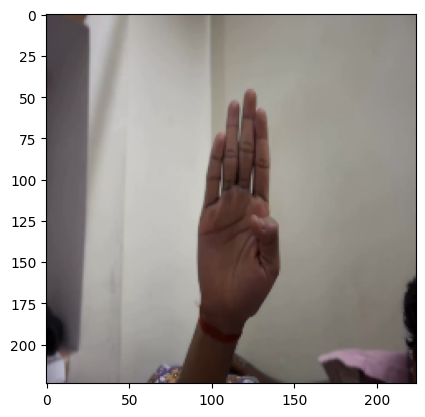

In [3]:
plt.imshow(load(path="images/A/A0.png"))

In [4]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [5]:
hands_detector = mp_hands.Hands(static_image_mode = True, min_detection_confidence = 0.5)

I0000 00:00:1753551460.983103  704879 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M3
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


W0000 00:00:1753551460.993494  707407 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1753551461.000771  707403 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [6]:
image = load(path="images/A/A0.png")
results = hands_detector.process(image)

W0000 00:00:1753551461.618169  707406 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


In [7]:
hands = results.multi_hand_landmarks

In [8]:
hands[0].landmark[0].x

0.4859689474105835

In [9]:
coords = []
for hand in hands:
    for landmark in hand.landmark:
        coord = [landmark.x, landmark.y, landmark.z]
        coords.append(coord)

In [10]:
np_coords = np.array(coords)
np_coords.shape

(21, 3)

In [11]:
np_coords[:, :2]

array([[0.48596895, 0.77821547],
       [0.55528384, 0.76347286],
       [0.60659713, 0.68027222],
       [0.6134463 , 0.5998143 ],
       [0.56746668, 0.57002693],
       [0.57607836, 0.52861071],
       [0.58239448, 0.41928145],
       [0.5837031 , 0.3453505 ],
       [0.58288354, 0.28332955],
       [0.53310865, 0.51335502],
       [0.54084873, 0.39457709],
       [0.54668128, 0.30652571],
       [0.55239886, 0.23548406],
       [0.48970512, 0.5191983 ],
       [0.49472988, 0.40570885],
       [0.50149703, 0.32590604],
       [0.50786304, 0.26133898],
       [0.44152001, 0.54257429],
       [0.4490945 , 0.45414323],
       [0.45786625, 0.39299908],
       [0.46863535, 0.33873674]])

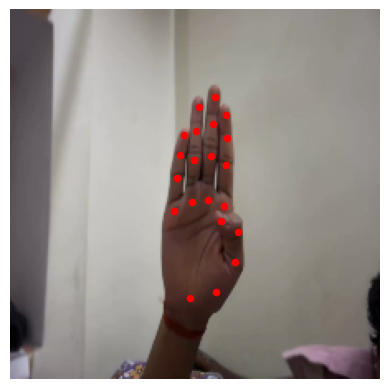

In [12]:
plt.imshow(image)
plt.scatter(np_coords[:, 0] * image.shape[1], np_coords[:, 1] * image.shape[0], c='r', s=20)
plt.axis('off')
plt.show()

In [13]:
def process_hand(image):
    results = hands_detector.process(image)
    hands = results.multi_hand_landmarks[0]
    landmarks = hands.landmark
    hand_coords = []
    for coords in landmarks:
        hand_coords.append([coords.x, coords.y, coords.z])
    hand_coords = np.array(hand_coords)
    return hand_coords[:, :2]

In [16]:
path = "images/"
data = []
labels = []
for label in os.listdir(path=path):
    if not os.path.isdir(os.path.join(path, label)):
            continue
    for file in os.listdir(os.path.join(path, label)):
        if not file.endswith(".png"):
            continue
        image = load(os.path.join(path, label, file))
        try:
            hand_coords = process_hand(image=image)
            data.append(hand_coords)
            labels.append(label)
        except:
             print(file)
             break

A197.png
L129.png


In [33]:
data = np.array(data)
labels= np.array(labels)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
X_train.shape

(271, 21, 2)

In [37]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])

In [38]:
X_train.shape, y_train.shape

((271, 42), (271, 1))

In [40]:
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/krishna/Desktop/OpenCv Projects/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [41]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
X_test.shape

(68, 42)

In [43]:
model.score(X_test, y_test)

1.0